<a href="https://colab.research.google.com/github/somyayq/ML-Model-/blob/main/Salary_Deciding_Mode(model_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Salary Prediction Model**

The Salary Dataset contains **25000 rows** and **29 columns** Contains the following data:

 1. IDX
 2. Applicant_ID
 3. Total_Experience
 4. Total_Experience_in_field_applied
 5. Department
 6. Role
 7. Industry
 8. Organization
 9. Designation
10. Education
11. Graduation_Specialization
12. University_Grad
13. Passing_Year_Of_Graduation
14. PG_Specialization
15. University_PG
16. Passing_Year_Of_PG
17. PHD_Specialization
18. University_PHD
19. Passing_Year_Of_PHD
20. Curent_Location
21. Preferred_location
22. Current_CTC
23. Inhand_Offer
24. Last_Appraisal_Rating
25. No_Of_Companies_worked
26. Number_of_Publications
27. Certifications
28. International_degree_any
29. Expected_CTC   ⬅️ (target column)


First we pre-process, clean and model the data to standarsise and structure it.

In [18]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
# load the csv file
file_path="/content/expected_ctc.csv"
df=pd.read_csv(file_path)

In [24]:
df.shape

(25000, 29)

In [25]:
df.head()

IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

       Department               Role   Industry Organization      Designation  \
0             NaN                NaN        NaN          NaN              NaN   
1              HR         Consultant  Analytics            H               HR   
2  Top Management         Consultant   Training            J              NaN   
3         Banking  Financial Analyst   Aviation            F               HR   
4           Sales    Project Manager  Insurance            E  Medical Officer   

   Education  ... Curent_Location Preferred_location  Current_CTC  \
0         PG  ...        Guwahati               Pune            0   
1  Doctorate  ...       Bangalore             Nagpur      2702664   
2  Doctorate  ...       Ahmedabad             Jaipur      2236661   
3  Doctorate  ...          Kanpur            Kolkata      2100510   
4       Grad  ...       Ahmedabad          Ahmedabad      1931644   

  Inhand_Offer Last_Appraisal_Rating  No_Of_Companies_worked  \
0            N                   NaN                       0   
1            Y         Key_Performer                       2   
2            Y         Key_Performer                       5   
3            N                     C                       5   
4            N                     C                       2   

  Number_of_Publications Certifications  International_degree_any Expected_CTC  
0                      0              0                         0       384551  
1                      4              0                         0      3783729  
2                      3              0                         0      3131325  
3                      3              0                         0      2608833  
4                      3              0                         0      2221390  

[5 rows x 29 columns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [27]:
df.describe(include = 'all')

IDX  Applicant_ID  Total_Experience  \
count   25000.000000  25000.000000      25000.000000   
unique           NaN           NaN               NaN   
top              NaN           NaN               NaN   
freq             NaN           NaN               NaN   
mean    12500.500000  34993.240080         12.493080   
std      7217.022701  14390.271591          7.471398   
min         1.000000  10000.000000          0.000000   
25%      6250.750000  22563.750000          6.000000   
50%     12500.500000  34974.500000         12.000000   
75%     18750.250000  47419.000000         19.000000   
max     25000.000000  60000.000000         25.000000   

        Total_Experience_in_field_applied Department    Role  Industry  \
count                        25000.000000      22222   24037     24092   
unique                                NaN         12      24        11   
top                                   NaN  Marketing  Others  Training   
freq                                  NaN       2379    2248      2237   
mean                             6.258200        NaN     NaN       NaN   
std                              5.819513        NaN     NaN       NaN   
min                              0.000000        NaN     NaN       NaN   
25%                              1.000000        NaN     NaN       NaN   
50%                              5.000000        NaN     NaN       NaN   
75%                             10.000000        NaN     NaN       NaN   
max                             25.000000        NaN     NaN       NaN   

       Organization Designation Education  ... Curent_Location  \
count         24092       21871     25000  ...           25000   
unique           16          18         4  ...              15   
top               M          HR        PG  ...       Bangalore   
freq           1574        1648      6326  ...            1742   
mean            NaN         NaN       NaN  ...             NaN   
std             NaN         NaN       NaN  ...             NaN   
min             NaN         NaN       NaN  ...             NaN   
25%             NaN         NaN       NaN  ...             NaN   
50%             NaN         NaN       NaN  ...             NaN   
75%             NaN         NaN       NaN  ...             NaN   
max             NaN         NaN       NaN  ...             NaN   

       Preferred_location   Current_CTC Inhand_Offer Last_Appraisal_Rating  \
count               25000  2.500000e+04        25000                 24092   
unique                 15           NaN            2                     5   
top                Kanpur           NaN            N                     B   
freq                 1720           NaN        17418                  5501   
mean                  NaN  1.760945e+06          NaN                   NaN   
std                   NaN  9.202125e+05          NaN                   NaN   
min                   NaN  0.000000e+00          NaN                   NaN   
25%                   NaN  1.027312e+06          NaN                   NaN   
50%                   NaN  1.802568e+06          NaN                   NaN   
75%                   NaN  2.443883e+06          NaN                   NaN   
max                   NaN  3.999693e+06          NaN                   NaN   

        No_Of_Companies_worked Number_of_Publications Certifications  \
count             25000.000000           25000.000000   25000.000000   
unique                     NaN                    NaN            NaN   
top                        NaN                    NaN            NaN   
freq                       NaN                    NaN            NaN   
mean                  3.482040               4.089040       0.773680   
std                   1.690335               2.606612       1.199449   
min                   0.000000               0.000000       0.000000   
25%                   2.000000               2.000000       0.000000   
50%                   3.000000               4.000000       0.000000   
75%  

In [28]:
df.isnull().sum()

IDX                                      0
Applicant_ID                             0
Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_Publications                   0
Certifications                           0
International_degree_any                 0
Expected_CTC                             0
dtype: int64

In [29]:
df = df.drop(columns=["IDX", "Applicant_ID"])

In [30]:
# Obtaining all the columns that have object and numerical datatype
categorical_cols = []
onehotcols = 0
numerical_cols = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_cols.append(column)
        print(column.upper(),': ',df[column].nunique())
        onehotcols += df[column].nunique()
        print(tuple(df[column].unique()))
        print('\n')
    else:
        numerical_cols.append(column)
print('CATEGORICAL COLUMNS: ',len(categorical_cols))
print('NUMERICAL COLUMNS: ', len(numerical_cols))
print(onehotcols)

DEPARTMENT :  12
(nan, 'HR', 'Top Management', 'Banking', 'Sales', 'Engineering', 'Others', 'Analytics/BI', 'Education', 'Marketing', 'Healthcare', 'IT-Software', 'Accounts')


ROLE :  24
(nan, 'Consultant', 'Financial Analyst', 'Project Manager', 'Area Sales Manager', 'Team Lead', 'Analyst', 'Others', 'CEO', 'Business Analyst', 'Sales Manager', 'Bio statistician', 'Scientist', 'Research Scientist', 'Head', 'Associate', 'Senior Researcher', 'Sales Execituve', 'Sr. Business Analyst', 'Principal Analyst', 'Data scientist', 'Researcher', 'Senior Analyst', 'Professor', 'Lab Executuve')


INDUSTRY :  11
(nan, 'Analytics', 'Training', 'Aviation', 'Insurance', 'Retail', 'FMCG', 'Others', 'Telecom', 'Automobile', 'IT', 'BFSI')


ORGANIZATION :  16
(nan, 'H', 'J', 'F', 'E', 'G', 'L', 'M', 'O', 'D', 'N', 'A', 'B', 'I', 'K', 'P', 'C')


DESIGNATION :  18
(nan, 'HR', 'Medical Officer', 'Director', 'Marketing Manager', 'Manager', 'Product Manager', 'Consultant', 'CA', 'Research Scientist', 'Sr.Mana

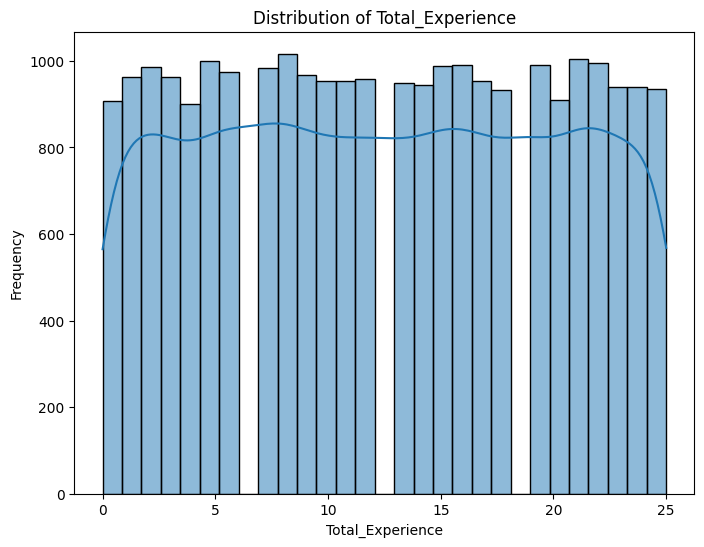

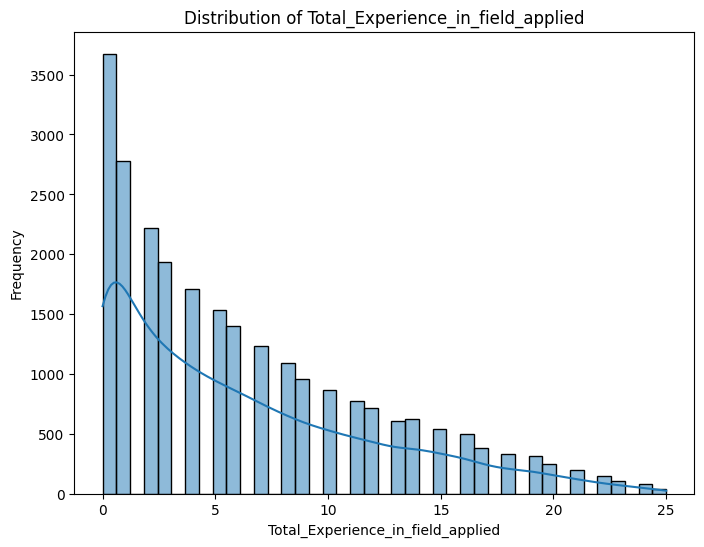

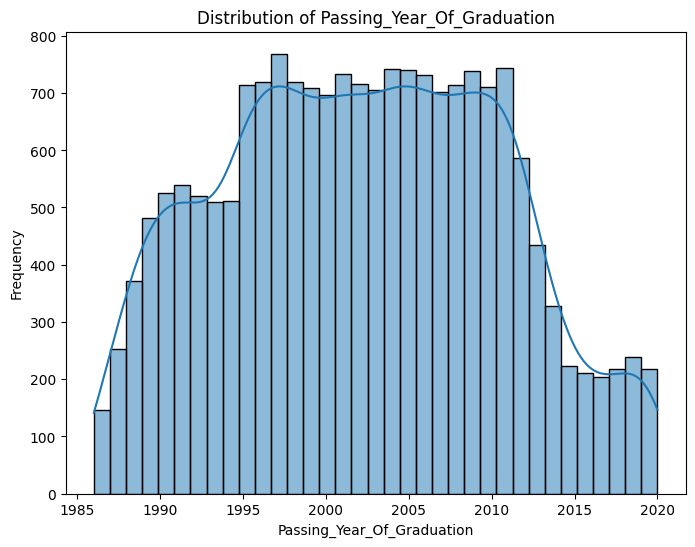

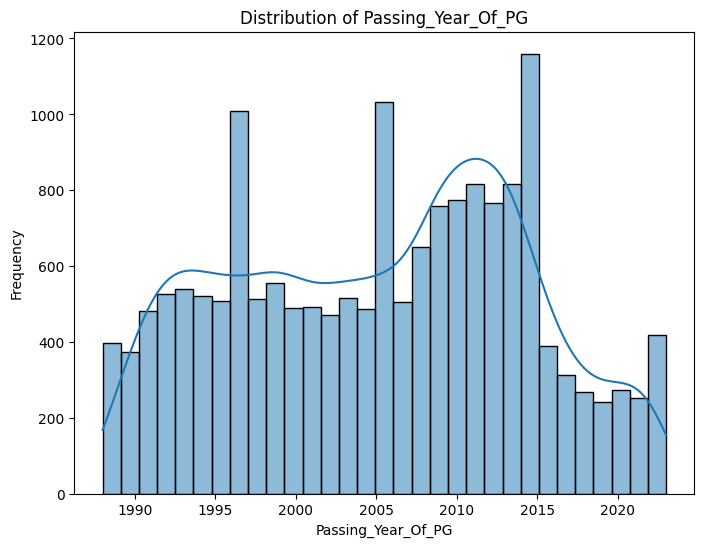

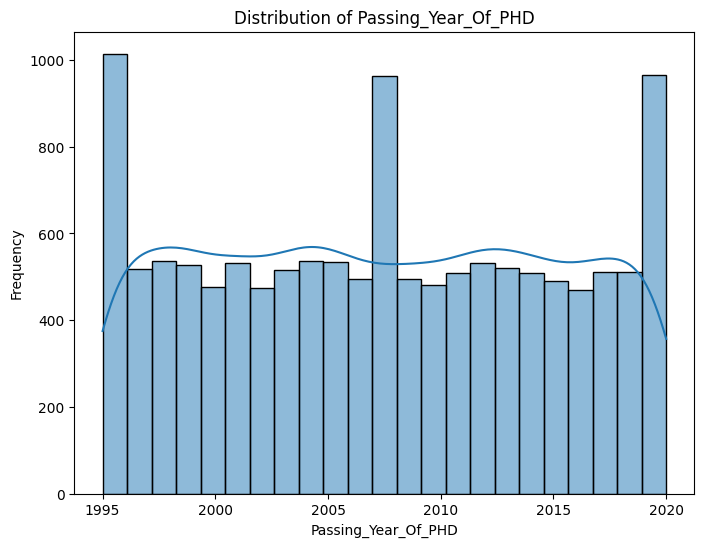

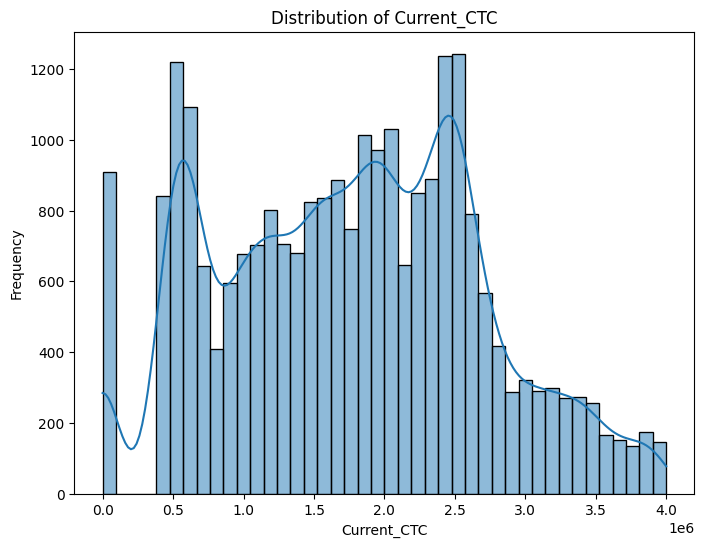

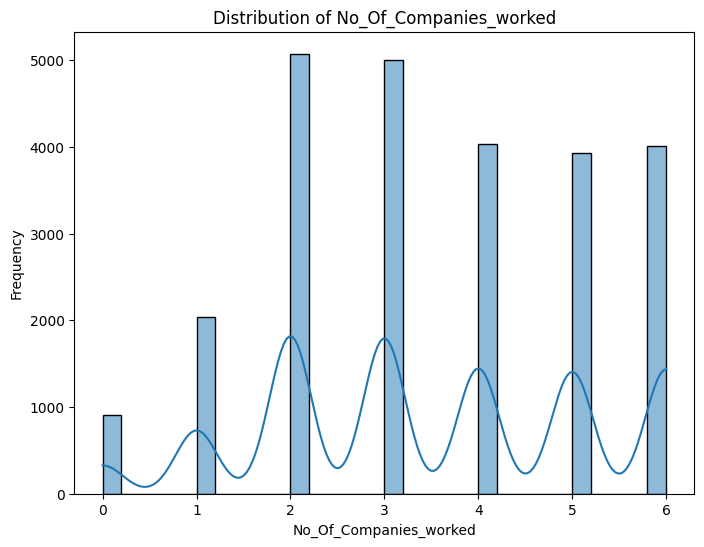

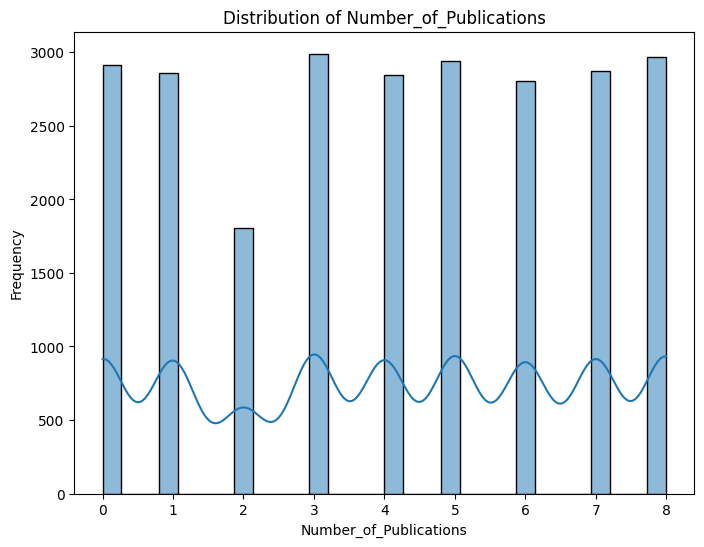

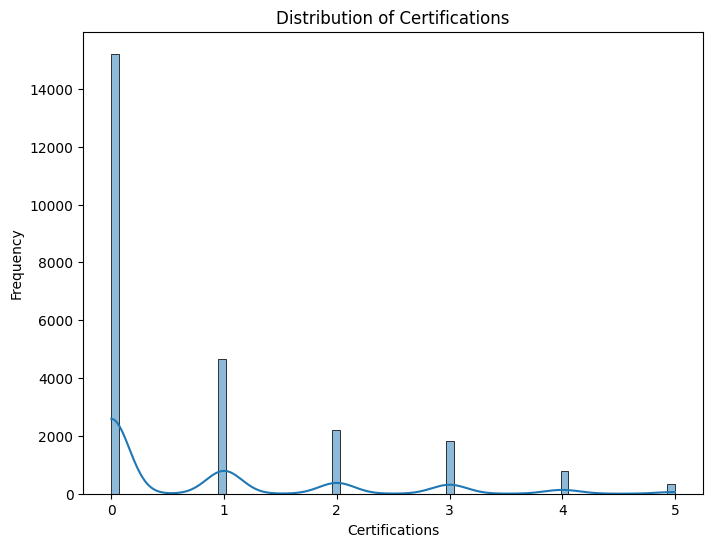

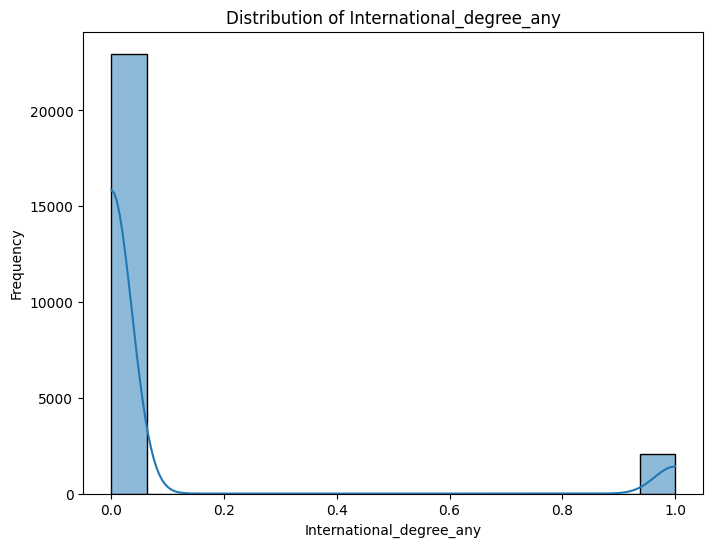

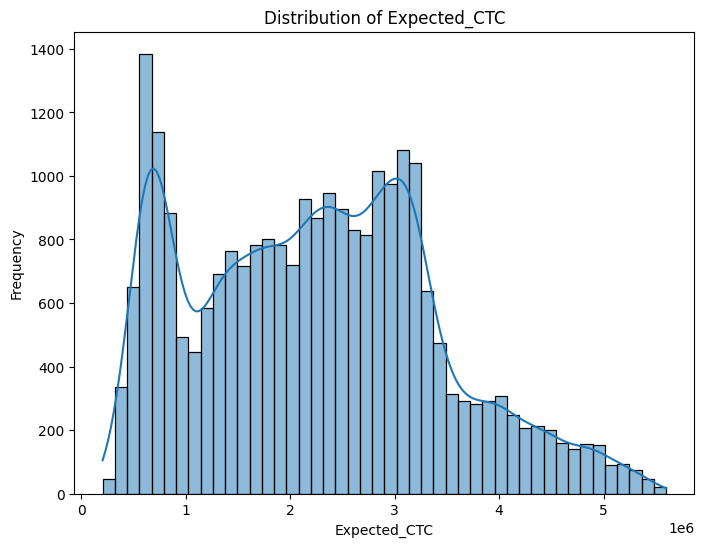

In [31]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

checking the analysis between two variables (Bivariate Analysis)

<Figure size 800x600 with 0 Axes>

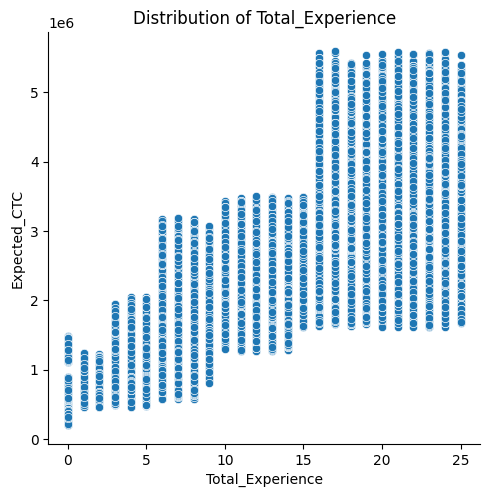

<Figure size 800x600 with 0 Axes>

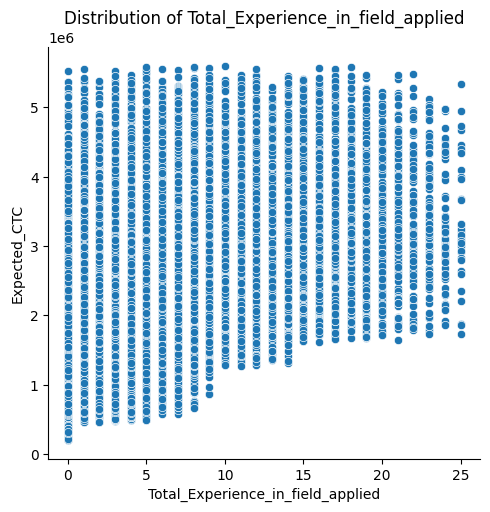

<Figure size 800x600 with 0 Axes>

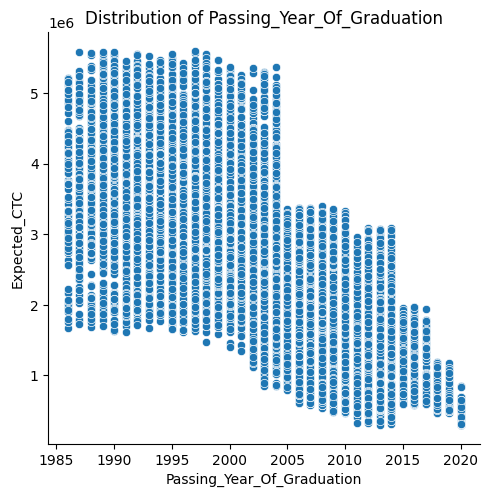

<Figure size 800x600 with 0 Axes>

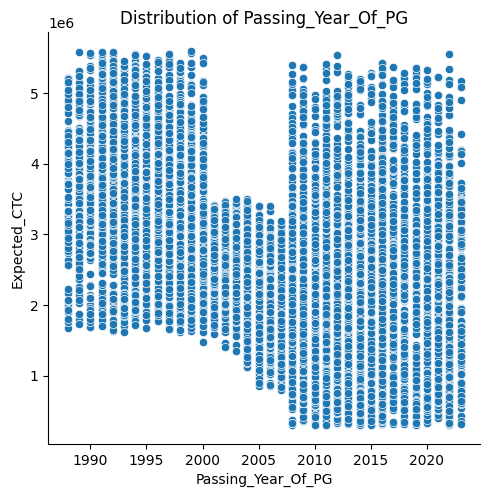

<Figure size 800x600 with 0 Axes>

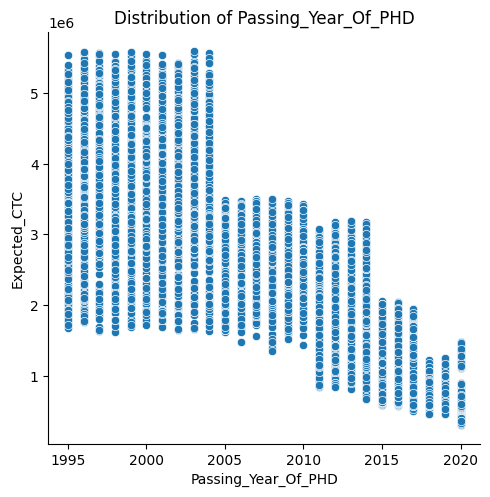

<Figure size 800x600 with 0 Axes>

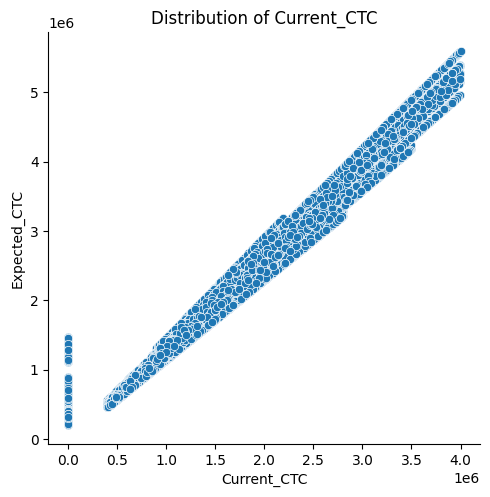

<Figure size 800x600 with 0 Axes>

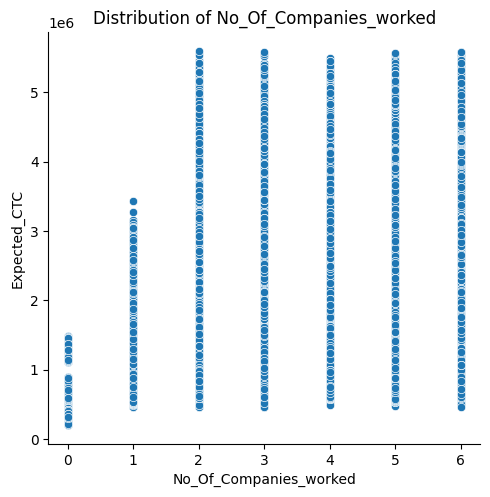

<Figure size 800x600 with 0 Axes>

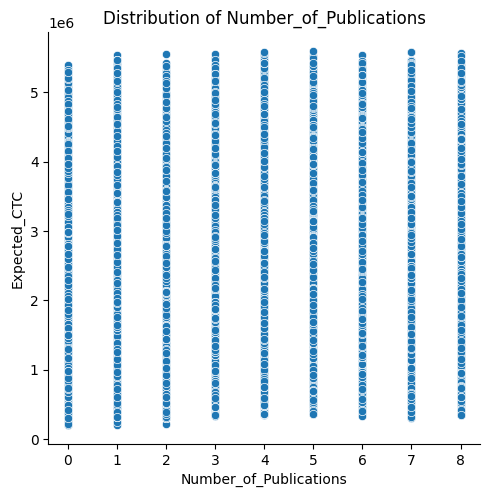

<Figure size 800x600 with 0 Axes>

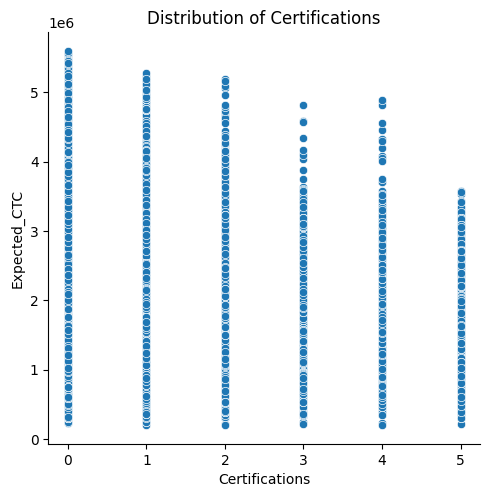

<Figure size 800x600 with 0 Axes>

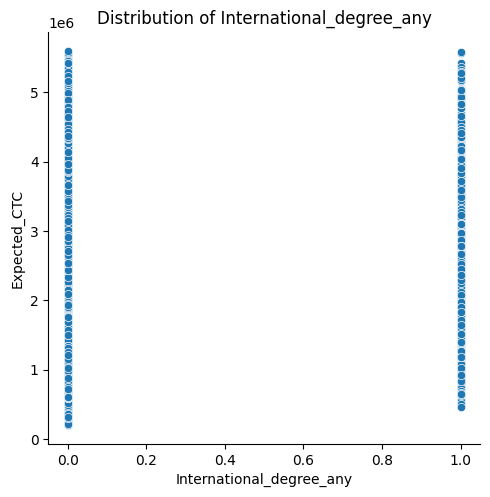

<Figure size 800x600 with 0 Axes>

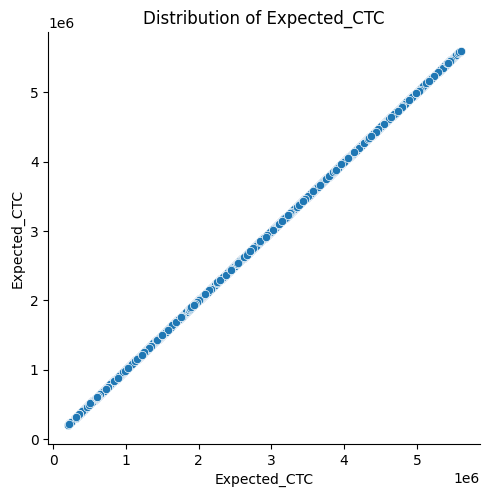

In [33]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.relplot(data = df, x = col, y = "Expected_CTC")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

<Figure size 800x600 with 0 Axes>

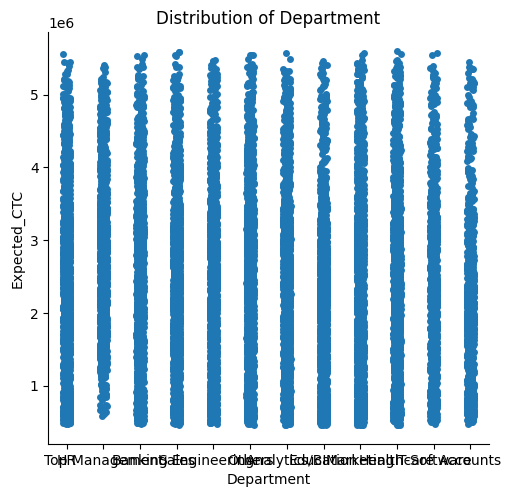

<Figure size 800x600 with 0 Axes>

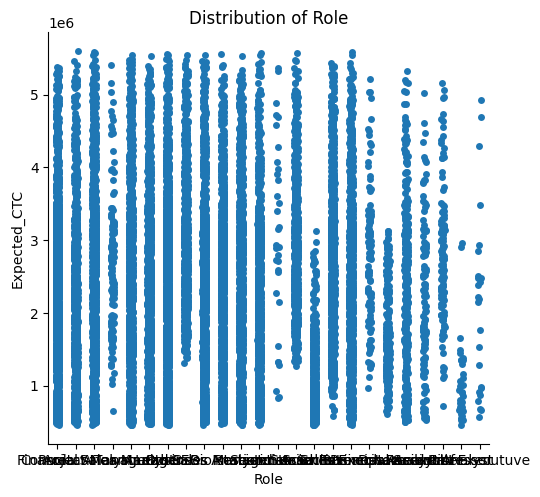

<Figure size 800x600 with 0 Axes>

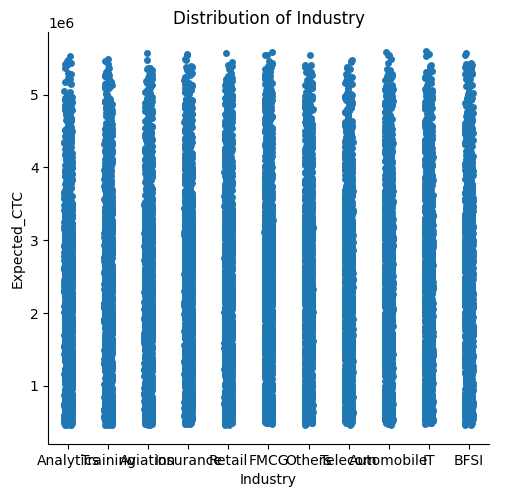

<Figure size 800x600 with 0 Axes>

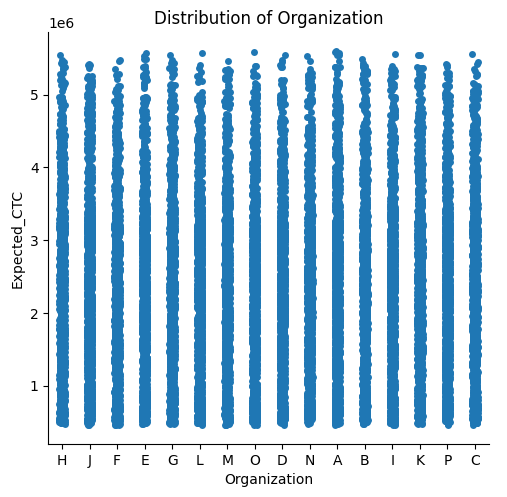

<Figure size 800x600 with 0 Axes>

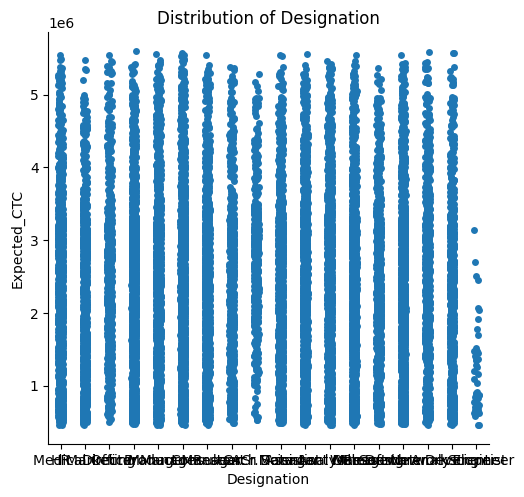

<Figure size 800x600 with 0 Axes>

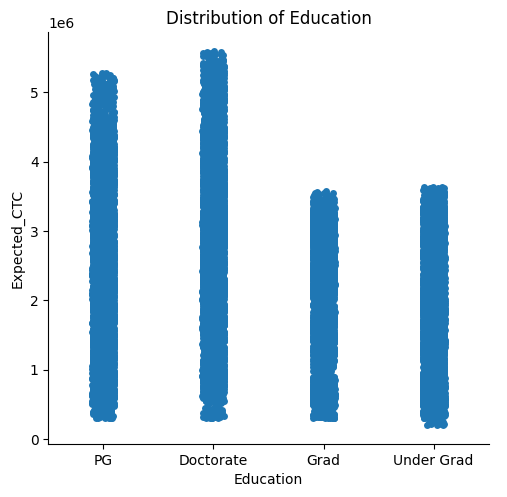

<Figure size 800x600 with 0 Axes>

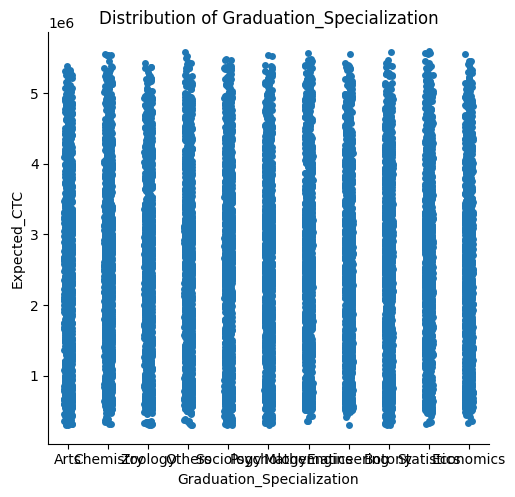

<Figure size 800x600 with 0 Axes>

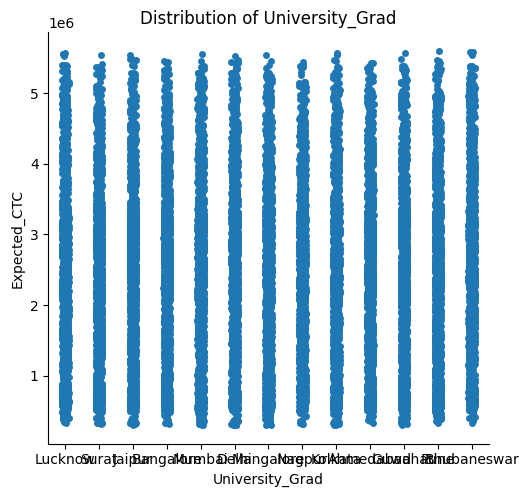

<Figure size 800x600 with 0 Axes>

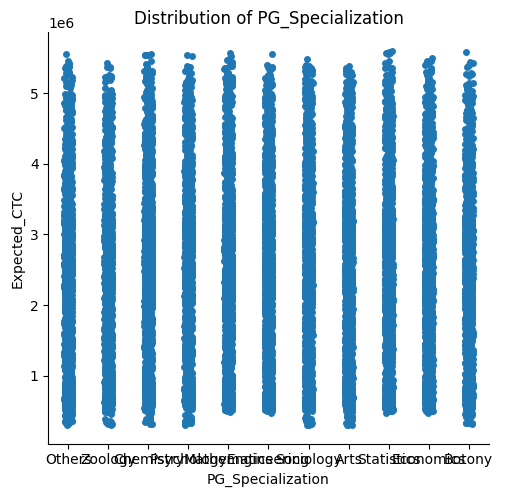

<Figure size 800x600 with 0 Axes>

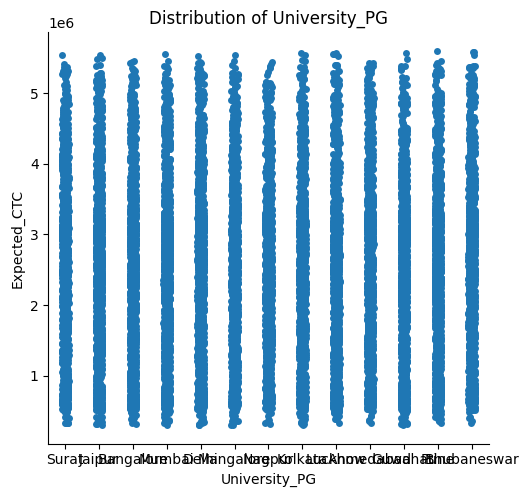

<Figure size 800x600 with 0 Axes>

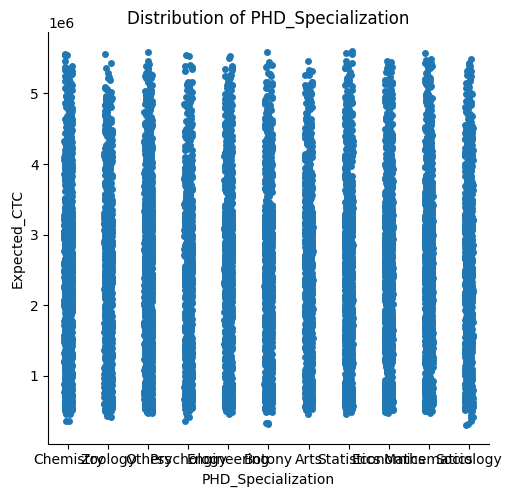

<Figure size 800x600 with 0 Axes>

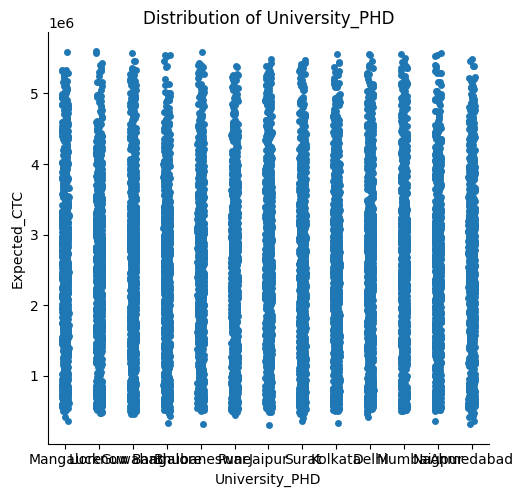

<Figure size 800x600 with 0 Axes>

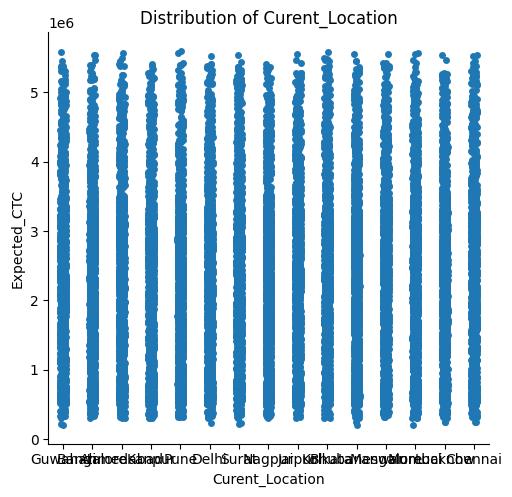

<Figure size 800x600 with 0 Axes>

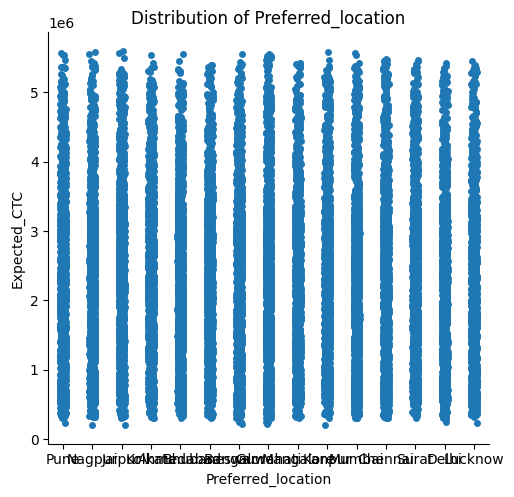

<Figure size 800x600 with 0 Axes>

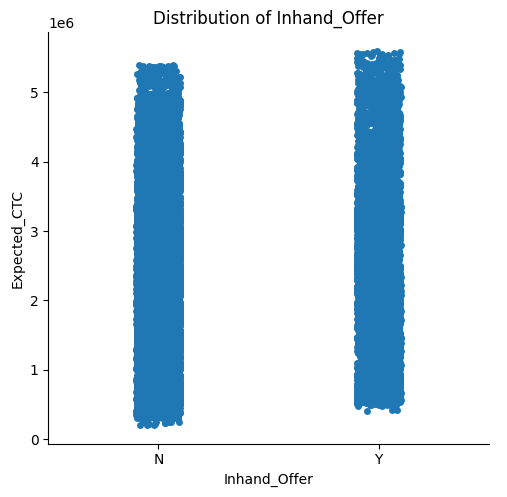

<Figure size 800x600 with 0 Axes>

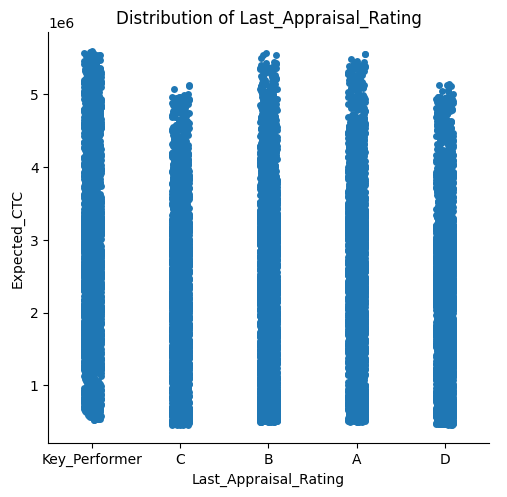

In [34]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.catplot(data = df, x = col, y = "Expected_CTC")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

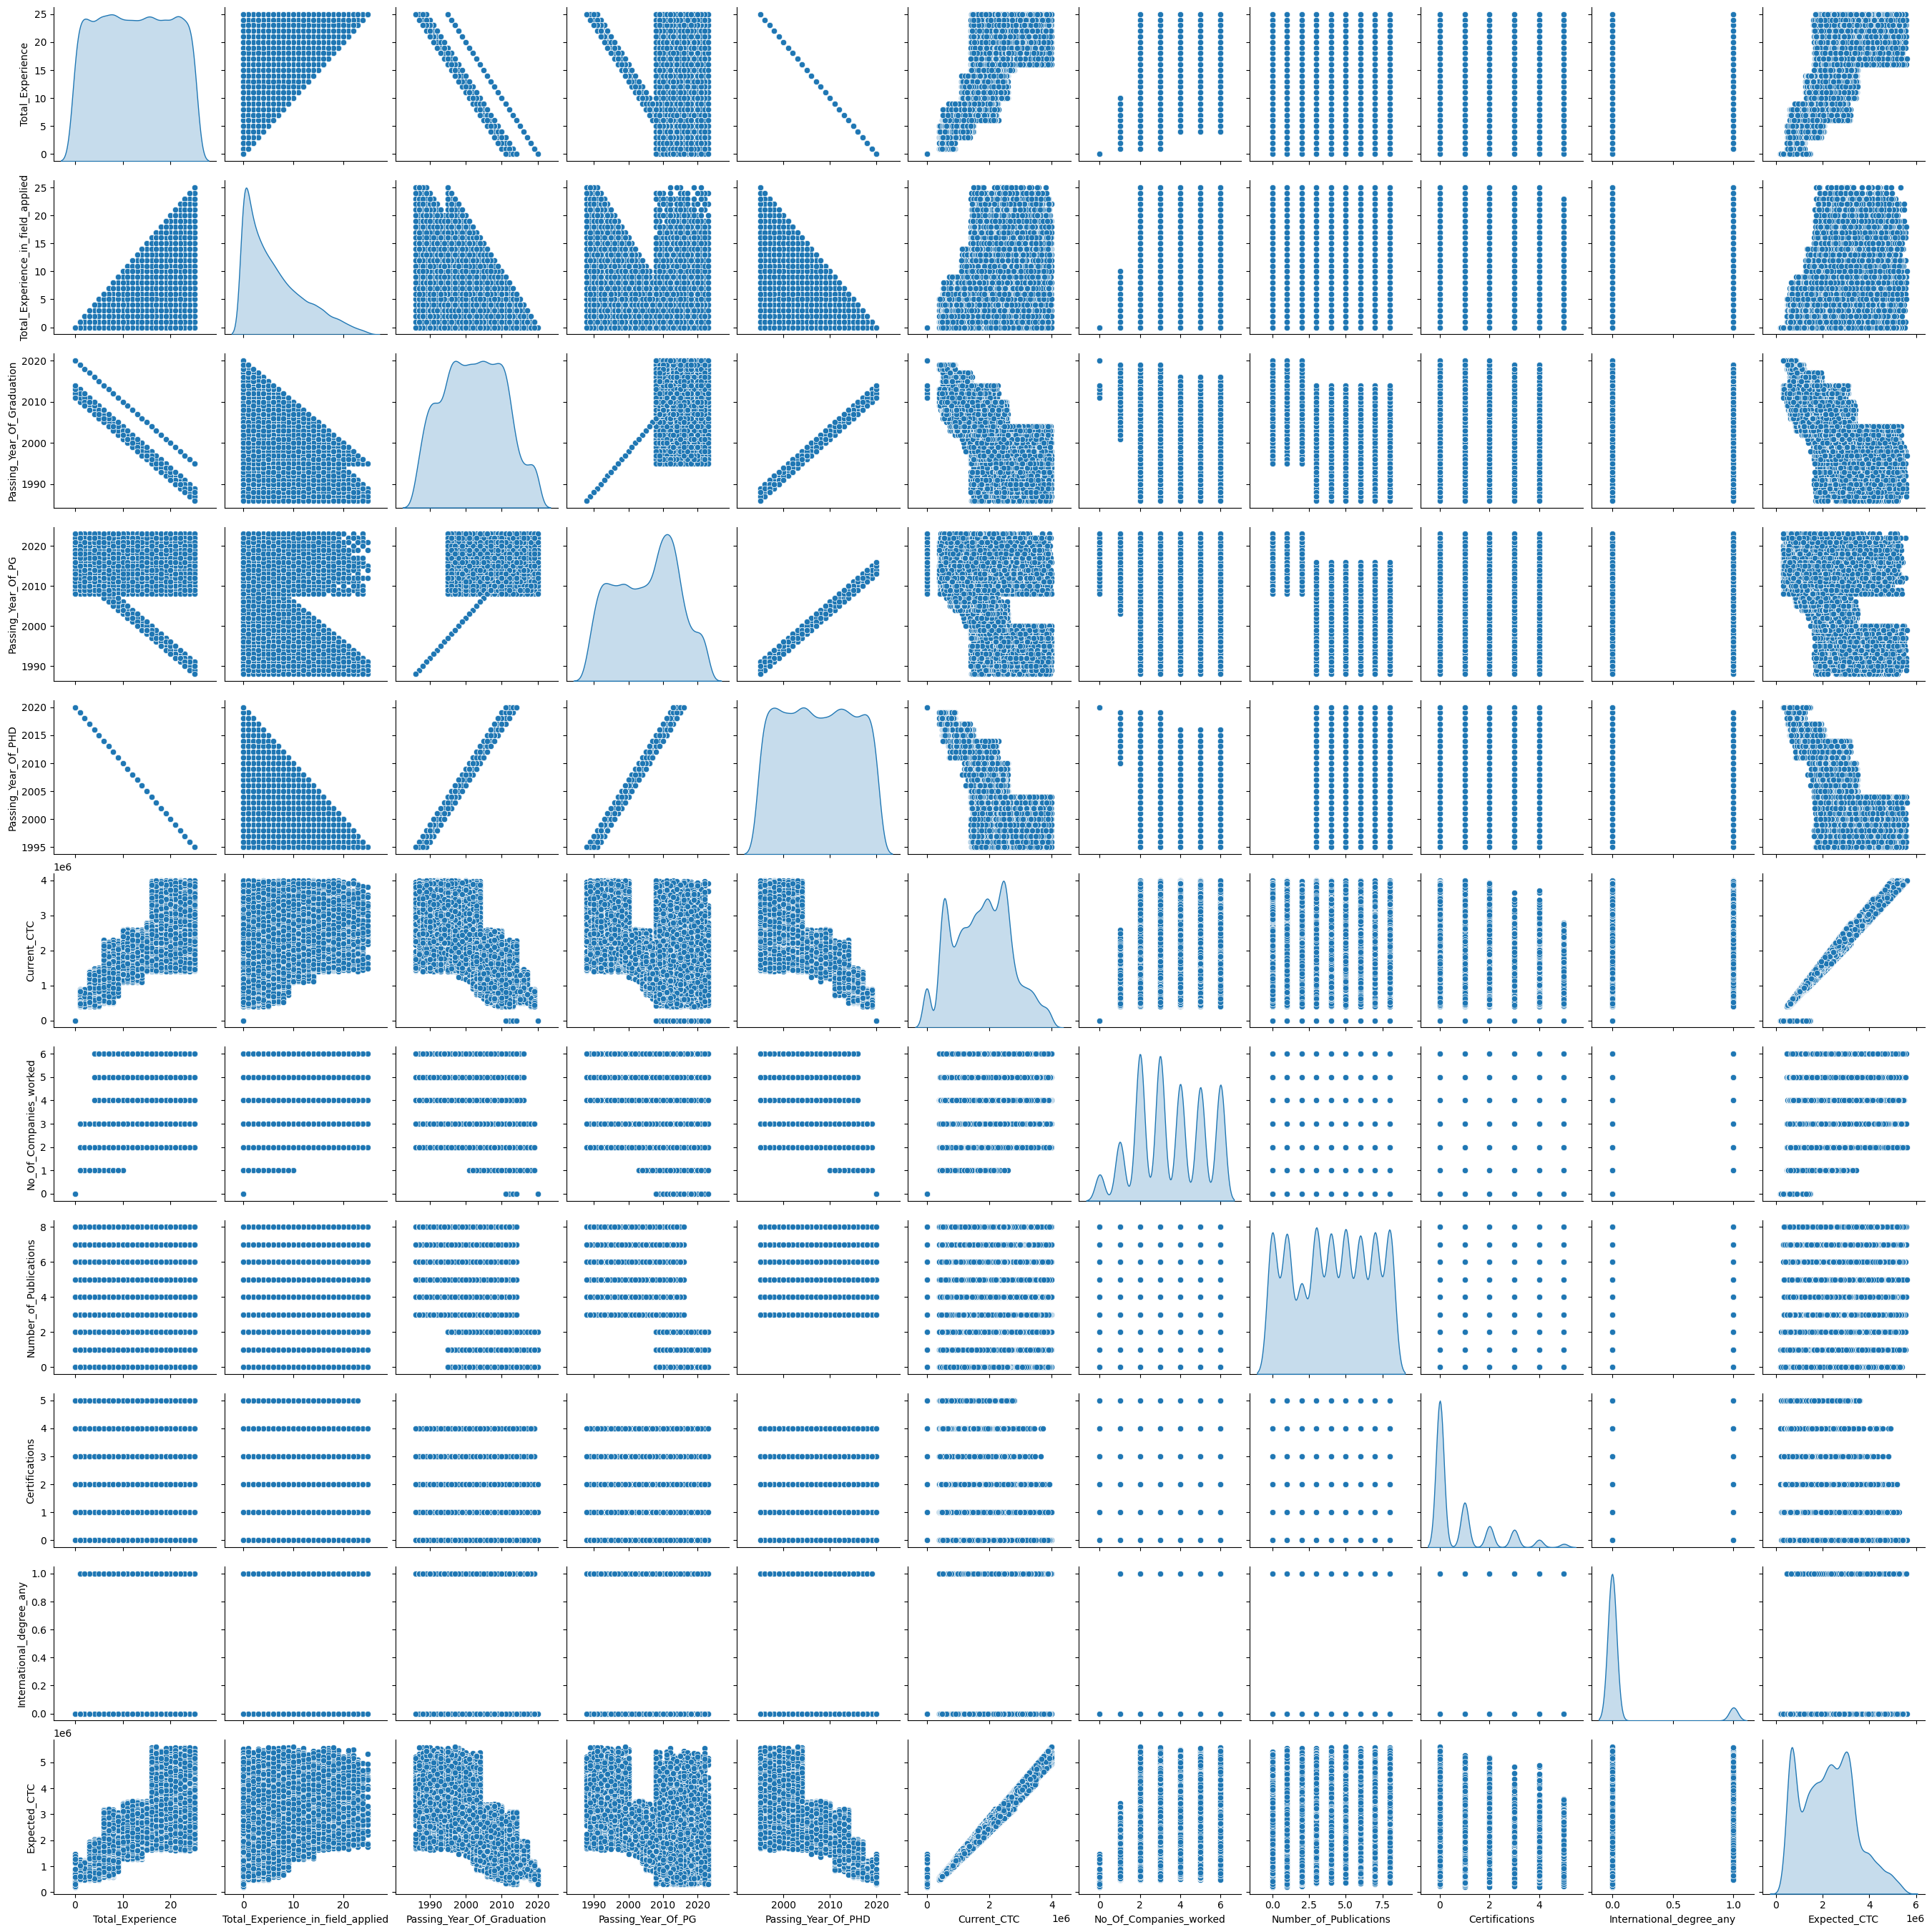

In [35]:
sns.pairplot(df,diag_kind='kde')

Checking for outliers

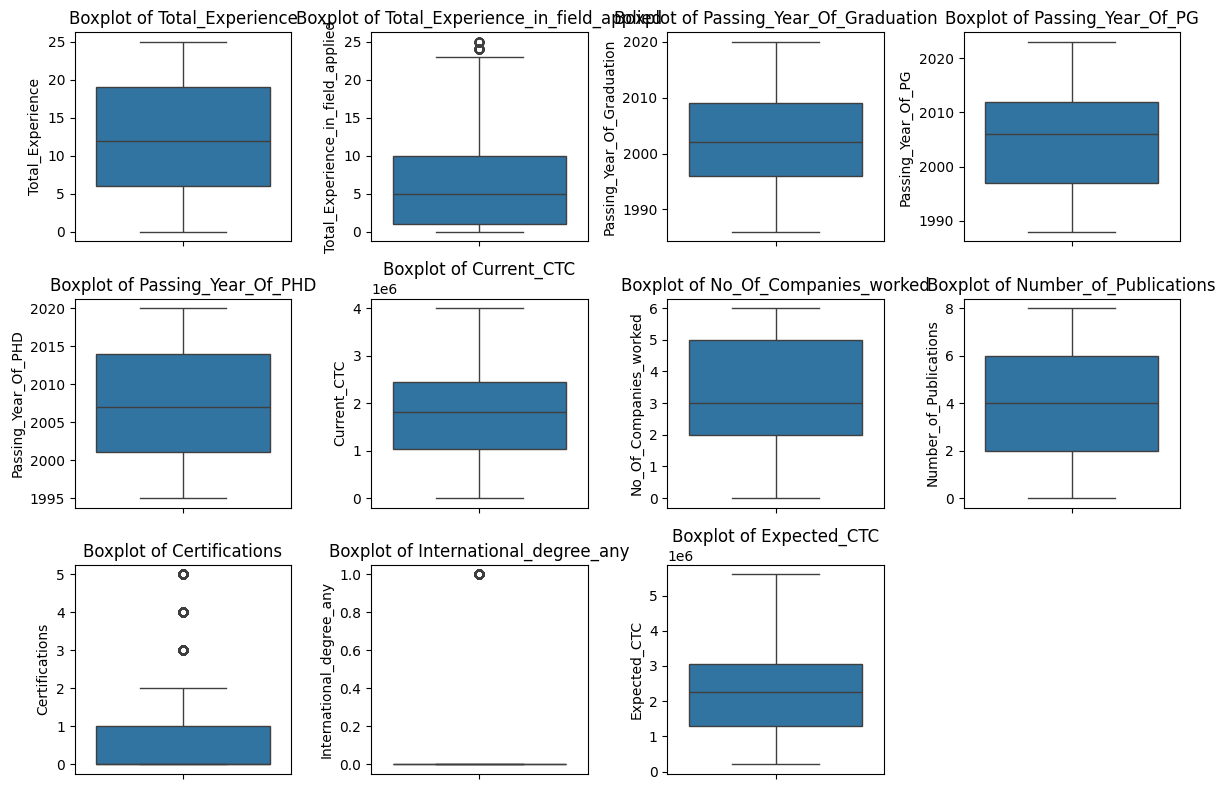

In [36]:
plt.figure(figsize = (12,8))
for i in range(len(numerical_cols)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df[numerical_cols[i]], data = df)
    plt.title('Boxplot of {}'.format(numerical_cols[i]))
    plt.tight_layout()

Outliers present are not as many

<Axes: >

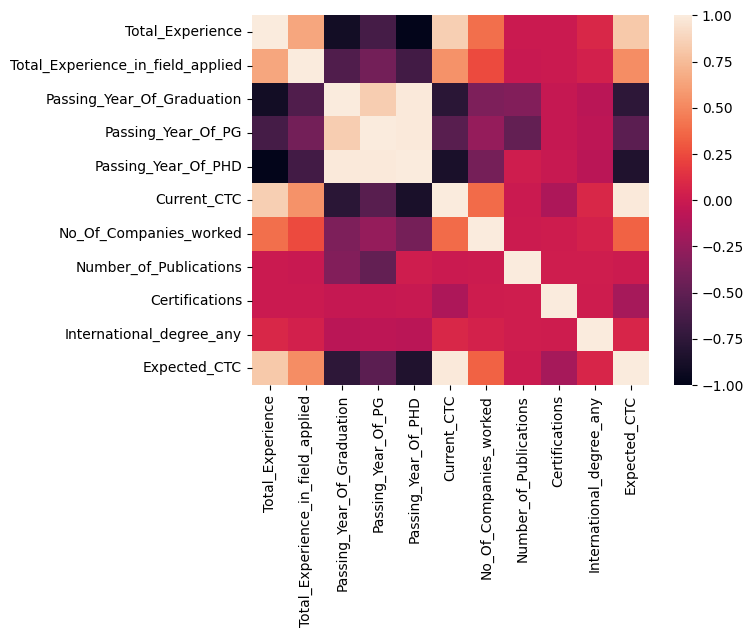

In [37]:
sns.heatmap(df[numerical_cols].corr(),annot=False)

Some correlations between the features like **Passing_Year_Of_PHD** , **Passing_Year_Of_PG** and **Passing_Year_Of_Graduation** are highly positively correlated with each other . While Passing year of Graduation is Highly negatively correlated with **Total_Experience** and **Curretn_CTC**

In [38]:
df.drop(columns = ["Passing_Year_Of_PG", "Passing_Year_Of_PHD", "Passing_Year_Of_Graduation"], inplace = True)
numerical_cols.remove("Passing_Year_Of_PG")
numerical_cols.remove("Passing_Year_Of_PHD")
numerical_cols.remove("Passing_Year_Of_Graduation")

<Axes: >

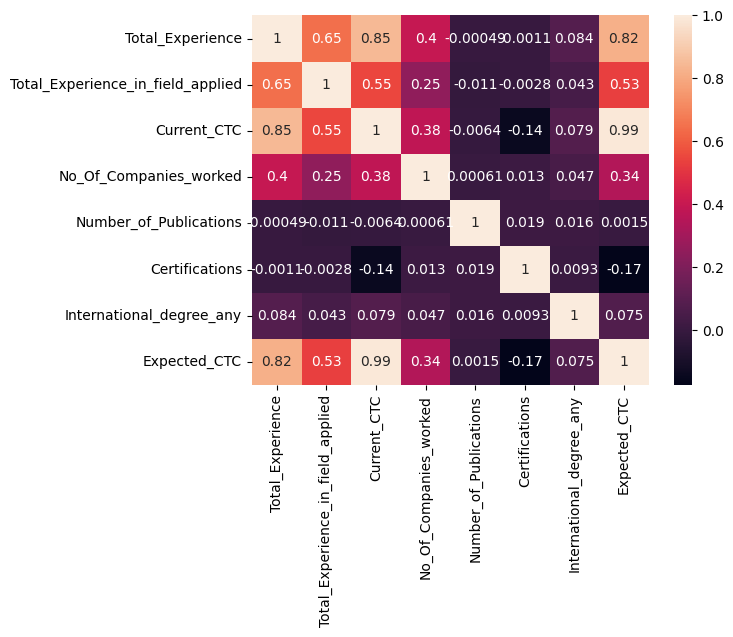

In [39]:
sns.heatmap(df[numerical_cols].corr(), annot = True)

In [40]:
#replace the null values with the fiil them with the NA
df.fillna("NA", inplace = True)

In [41]:
df.isnull().sum()

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
University_Grad                      0
PG_Specialization                    0
University_PG                        0
PHD_Specialization                   0
University_PHD                       0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any             0
Expected_CTC                         0
dtype: int64

One Hot encoding of the categorical variables and scaling of the numerical data types

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [43]:
categorical_cols = []
numerical_cols = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_cols.append(column)
    else:
        numerical_cols.append(column)
numerical_cols.remove("Expected_CTC")

In [44]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
        , ('num', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)
encoded_array = preprocessor.fit_transform(df)
df_encoded = pd.DataFrame(encoded_array, columns=preprocessor.get_feature_names_out())

In [45]:
df_encoded.head()

cat__Department_Accounts  cat__Department_Analytics/BI  \
0                       0.0                           0.0   
1                       0.0                           0.0   
2                       0.0                           0.0   
3                       0.0                           0.0   
4                       0.0                           0.0   

   cat__Department_Banking  cat__Department_Education  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        0.0   
3                      1.0                        0.0   
4                      0.0                        0.0   

   cat__Department_Engineering  cat__Department_HR  \
0                          0.0                 0.0   
1                          0.0                 1.0   
2                          0.0                 0.0   
3                          0.0                 0.0   
4                          0.0                 0.0   

   cat__Department_Healthcare  cat__Department_IT-Software  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   

   cat__Department_Marketing  cat__Department_NA  ...  \
0                        0.0                 1.0  ...   
1                        0.0                 0.0  ...   
2                        0.0                 0.0  ...   
3                        0.0                 0.0  ...   
4                        0.0                 0.0  ...   

   cat__Last_Appraisal_Rating_Key_Performer  cat__Last_Appraisal_Rating_NA  \
0                                       0.0                            1.0   
1                                       1.0                            0.0   
2                                       1.0                            0.0   
3                                       0.0                            0.0   
4                                       0.0                            0.0   

   num__Total_Experience  num__Total_Experience_in_field_applied  \
0              -1.672154                               -1.075404   
1               1.406314                                1.330344   
2               1.138621                                0.986666   
3               0.335542                                0.299309   
4              -0.333690                               -0.216208   

   num__Current_CTC  num__No_Of_Companies_worked  num__Number_of_Publications  \
0         -1.913667                    -2.060012                    -1.568750   
1          1.023391                    -0.876791                    -0.034160   
2          0.516973                     0.898041                    -0.417807   
3          0.369014                     0.898041                    -0.417807   
4          0.185503                    -0.876791                    -0.417807   

   num__Certifications  num__International_degree_any  remainder__Expected_CTC  
0            -0.645043                      -0.298316                 384551.0  
1            -0.645043                      -0.298316                3783729.0  
2            -0.645043                      -0.298316                3131325.0  
3            -0.645043                      -0.298316                2608833.0  
4            -0.645043                      -0.298316                2221390.0  

[5 rows x 214 columns]

In [46]:
df_encoded["remainder__Expected_CTC"].describe()

count    2.500000e+04
mean     2.250155e+06
std      1.160480e+06
min      2.037440e+05
25%      1.306278e+06
50%      2.252136e+06
75%      3.051354e+06
max      5.599570e+06
Name: remainder__Expected_CTC, dtype: float64

# **Selection and training of the model**

In [47]:
from sklearn.model_selection import train_test_split
x = df_encoded.drop(columns = ["remainder__Expected_CTC"])
y = df_encoded["remainder__Expected_CTC"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

a) Linear Regression Model

In [48]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5430405073.702613
R-squared: 0.995984842669071


In [49]:
import math
math.sqrt(mse)

73691.28220965227

In [50]:
print("Cofficients:",reg.coef_)
print("Intercept:",reg.intercept_)

Cofficients: [ 3.16491567e+03  9.72839930e+02 -5.95848682e+02  3.18359482e+03
 -1.18790503e+03 -3.99074547e+01 -6.15773152e+02 -2.76149411e+03
  2.72976499e+03 -4.95650930e+01 -1.41260077e+03 -1.09882906e+03
 -2.28919207e+03 -2.87131717e+03  1.20742144e+03  6.30893333e+02
 -1.03893359e+02 -2.62776967e+03 -6.52797129e+03 -2.24423091e+02
 -2.06884105e+03 -1.76934999e+03 -8.44495786e+03  2.52788027e+03
  6.77174191e+03 -2.75192711e+03  7.78609804e+03  2.91048557e+04
 -4.02723057e+03 -2.56906594e+03  5.74630326e+03 -3.50127648e+03
 -2.73615247e+03 -2.86035914e+03 -1.39182796e+03 -2.25907097e+03
 -4.80761361e+03 -2.23214628e+03 -1.65659958e+04 -1.59972653e+04
 -1.52493936e+04 -1.48610396e+04 -1.65464472e+04 -1.45595224e+04
 -1.42303821e+04  1.70837635e+05 -1.52042732e+04 -1.45209260e+04
 -1.55469872e+04 -1.75554026e+04 -7.82468912e+03 -1.07069355e+04
 -1.28733194e+04 -1.10095199e+04 -1.00032393e+04 -1.02243685e+04
 -1.10587927e+04 -1.10571790e+04 -1.10011839e+04 -1.05578491e+04
 -7.77609432

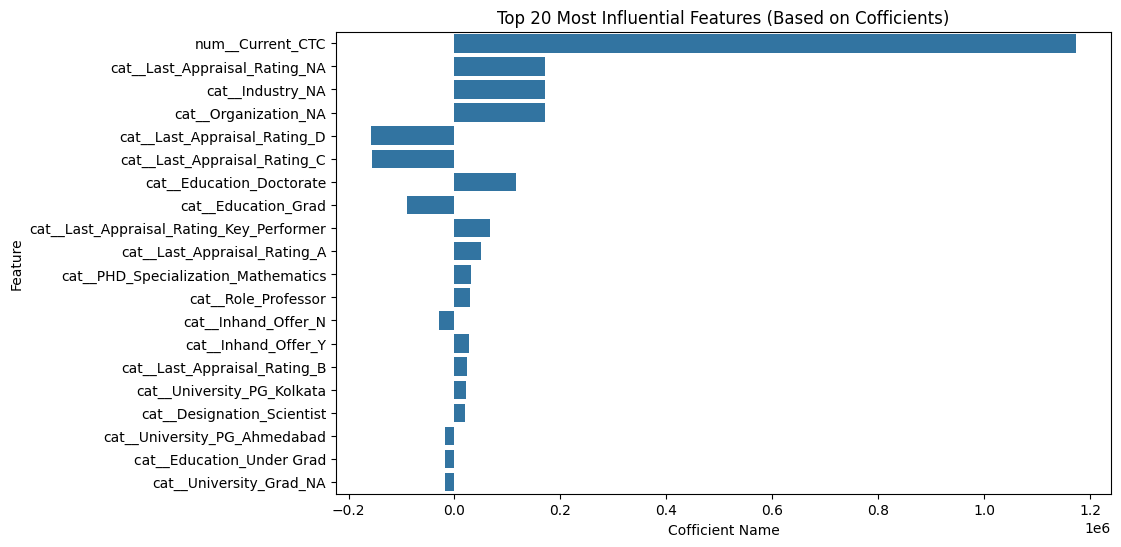

In [51]:
feature_names=x_train.columns

cofficients = reg.coef_

coef_df = pd.DataFrame({'Feature':feature_names,'Cofficient':cofficients})

sorted_coef_df = coef_df.reindex(coef_df['Cofficient'].abs().sort_values(ascending=False).index)

top_n=20
plt.figure(figsize=(10,6))
sns.barplot(x='Cofficient',y='Feature',data=sorted_coef_df.head(top_n))
plt.title(f'Top {top_n} Most Influential Features (Based on Cofficients)')
plt.xlabel('Cofficient Name')
plt.ylabel('Feature')
plt.show()


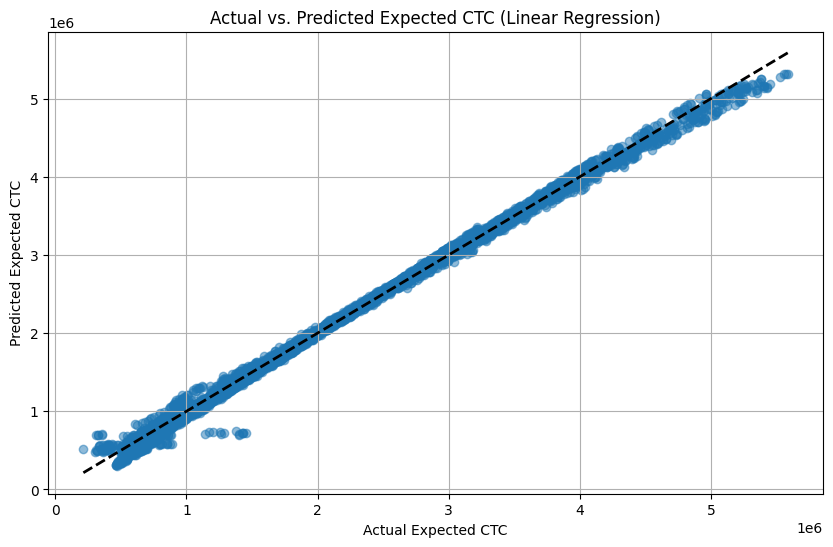

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Expected CTC")
plt.ylabel("Predicted Expected CTC")
plt.title("Actual vs. Predicted Expected CTC (Linear Regression)")
plt.grid(True)
plt.show()

b) PCA

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
pca.fit(x)
print("Number of components:", pca.n_components_)
print("Explained Variance :", pca.explained_variance_ratio_)

Number of components: 20
Explained Variance : [0.13105053 0.08817151 0.05874577 0.04913665 0.03920266 0.02786765
 0.02284437 0.02128887 0.01245384 0.01162939 0.01076023 0.00983736
 0.00953079 0.00919769 0.00859078 0.00843788 0.00815869 0.00788712
 0.00753284 0.0064682 ]


In [54]:
print(pca.components_)

[[-7.16074340e-05  2.84933517e-03  5.22380212e-03 ...  2.70021541e-02
  -9.71125832e-02  7.93209171e-02]
 [-1.42215278e-03  3.17857959e-03  1.26115137e-03 ... -2.92276205e-01
   5.03238165e-01  1.92872145e-02]
 [ 1.47484943e-02  5.05141781e-03  1.29173390e-03 ...  7.76774465e-01
   4.26709966e-01  1.44282153e-01]
 ...
 [ 3.01948791e-02 -2.21406618e-02 -1.78679351e-03 ... -4.72661691e-02
  -9.67308846e-03 -1.23186394e-03]
 [ 6.92392185e-02 -3.46260484e-02 -2.60126377e-02 ... -1.38390071e-01
  -3.55090733e-02 -1.20989359e-02]
 [-2.29424033e-06 -1.16475215e-02 -1.52457527e-02 ... -1.19045538e-02
   4.19850710e-03  1.74280307e-03]]


In [55]:
column_names = []
for i in range(pca.n_components_):
    column_names.append(f"PC{i+1}")

extracted_components = pd.DataFrame(pca.components_.T, columns= column_names, index=x.columns)
extracted_components

PC1       PC2       PC3       PC4  \
cat__Department_Accounts      -0.000072 -0.001422  0.014748 -0.000073   
cat__Department_Analytics/BI   0.002849  0.003179  0.005051  0.024687   
cat__Department_Banking        0.005224  0.001261  0.001292 -0.002564   
cat__Department_Education     -0.000274 -0.000111 -0.000545 -0.003398   
cat__Department_Engineering    0.005675  0.000958  0.000620 -0.000153   
...                                 ...       ...       ...       ...   
num__Current_CTC               0.555294 -0.011065 -0.066613 -0.021202   
num__No_Of_Companies_worked    0.339675  0.123659  0.077933 -0.029120   
num__Number_of_Publications    0.027002 -0.292276  0.776774 -0.121928   
num__Certifications           -0.097113  0.503238  0.426710 -0.058743   
num__International_degree_any  0.079321  0.019287  0.144282  0.973352   

                                    PC5       PC6       PC7       PC8  \
cat__Department_Accounts       0.003395 -0.000844  0.006935  0.026770   
cat__Department_Analytics/BI   0.005822  0.005251 -0.009982  0.001690   
cat__Department_Banking        0.004153 -0.002231 -0.005794  0.001021   
cat__Department_Education      0.009336 -0.003939  0.009906  0.003598   
cat__Department_Engineering    0.003190 -0.001319 -0.006133 -0.004350   
...                                 ...       ...       ...       ...   
num__Current_CTC              -0.095003  0.069085 -0.442022 -0.202166   
num__No_Of_Companies_worked    0.877216 -0.032586  0.247200  0.018978   
num__Number_of_Publications   -0.064340 -0.309498  0.053448 -0.244905   
num__Certifications           -0.058300  0.697886 -0.008985 -0.046488   
num__International_degree_any -0.028526 -0.014297  0.043894  0.000031   

                                    PC9      PC10      PC11      PC12  \
cat__Department_Accounts       0.002419  0.003556  0.022295 -0.035446   
cat__Department_Analytics/BI  -0.004220  0.007763  0.025035 -0.020580   
cat__Department_Banking        0.005367  0.002808  0.022121 -0.026161   
cat__Department_Education      0.001741  0.002685  0.026101 -0.030971   
cat__Department_Engineering   -0.000144  0.009081  0.033574 -0.009757   
...                                 ...       ...       ...       ...   
num__Current_CTC              -0.103195  0.116777 -0.004923  0.032584   
num__No_Of_Companies_worked   -0.042304 -0.006165 -0.097408  0.104858   
num__Number_of_Publications   -0.008461 -0.047488 -0.001875  0.043537   
num__Certifications           -0.049564  0.182339 -0.069546  0.066454   
num__International_degree_any -0.008016 -0.000307 -0.011757  0.004233   

                                   PC13      PC14      PC15      PC16  \
cat__Department_Accounts      -0.007357  0.019622 -0.008259  0.013688   
cat__Department_Analytics/BI  -0.005402  0.011070  0.017109  0.001505   
cat__Department_Banking       -0.001139 -0.002585 -0.003629  0.000113   
cat__Department_Education     -0.009616  0.009452  0.007956 -0.010273   
cat__Department_Engineering   -0.001881  0.006980 -0.015970 -0.002887   
...                                 ...       ...       ...       ...   
num__Current_CTC               0.026725 -0.020047  0.006518 -0.017426   
num__No_Of_Companies_worked    0.015006 -0.026285  0.003783  0.008068   
num__Number_of_Publications    0.019289 -0.022540 -0.000669 -0.027726   
num__Certifications            0.001755 -0.013825  0.019055 -0.006806   
num__International_degree_any  0.005306 -0.002198 -0.000089 -0.002532   

                                   PC17      PC18      PC19      PC20  
cat__Department_Accounts       0.026423  0.030195  0.069239 -0.000002  
cat__Department_Analytics/BI  -0.004963 -0.022141 -0.034626 -0.011648  
cat__Department_Banking       -0.009562 -0.001787 -0.026013 -0.015246  
cat__Department_Education      0.011838 -0.001873 -0.000918  0.008936  
cat__Department_Engineering    0.000661 -0.012909 -0.021330 -0.005496  
...                                 ...       ...       ...       ...  
num__Current_CTC        

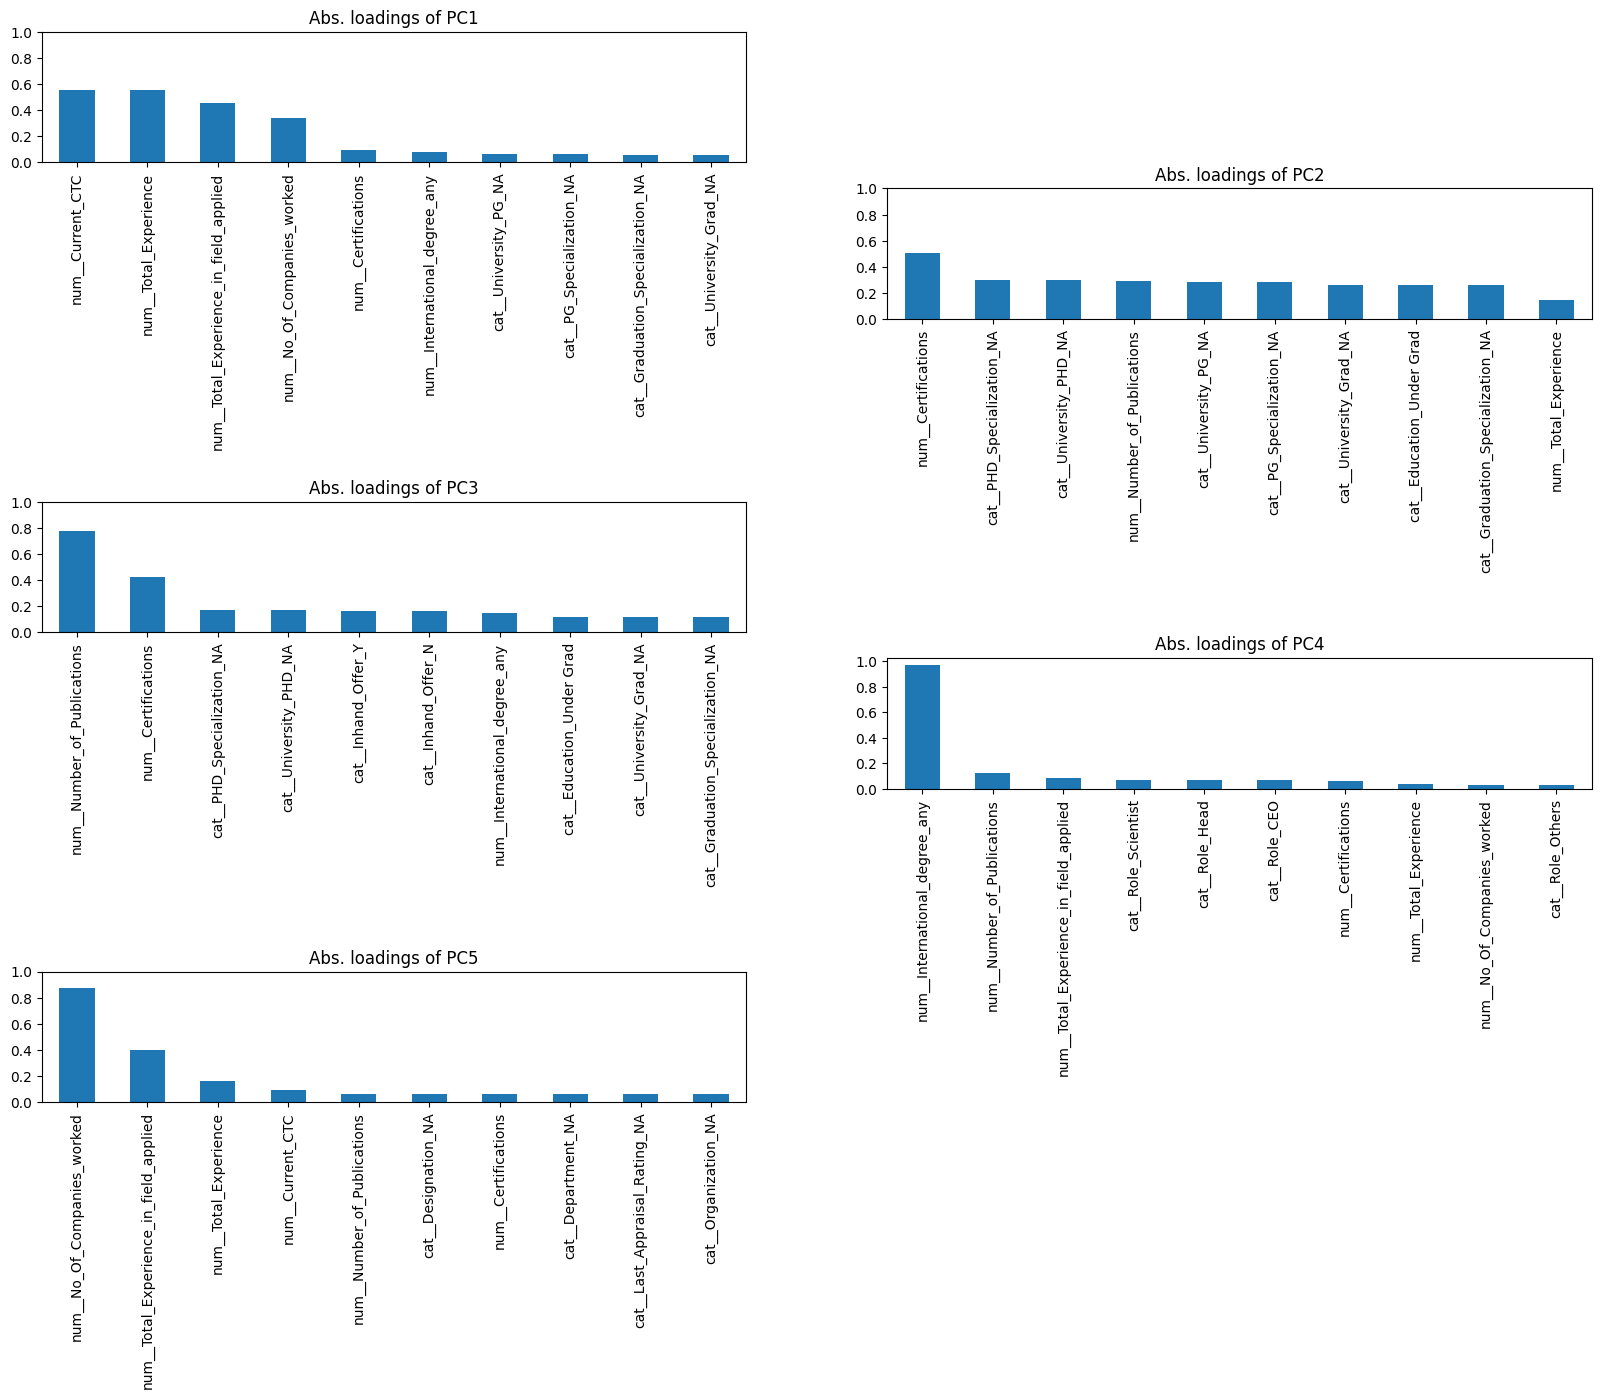

In [56]:
#Bar plot showing the influence of the top 10 features on the top 5 components that explain the highest variance
plt.figure(figsize = (20,20))
number_of_components = 5
number_of_features = 10
for i in range(min(len(extracted_components.columns), number_of_components)):
    plt.subplot(10,2,3*i+1)
    abs(extracted_components[extracted_components.columns[i]]).T.sort_values(ascending = False)[:number_of_features].plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(extracted_components.columns[i]))
    plt.tight_layout()

<Axes: >

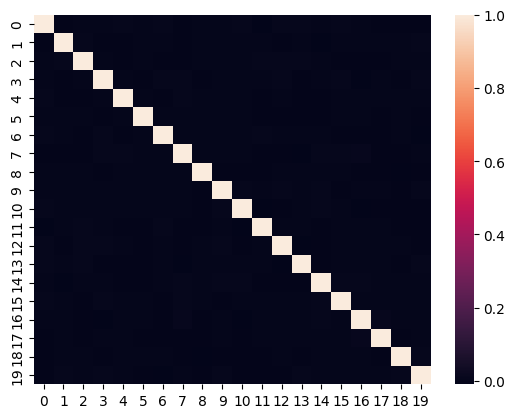

In [57]:
x_pca = pca.transform(x_train)
sns.heatmap(pd.DataFrame(data = x_pca).corr(), annot = False)

In [58]:
reg_pca = linear_model.LinearRegression()
x_pca = pca.transform(x_train)
reg_pca.fit(x_pca, y_train)
y_pred_pca = reg_pca.predict(pca.transform(x_test))
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print("Mean Squared Error:", mse_pca)
print("R-squared:", r2_pca)

Mean Squared Error: 55227274848.76043
R-squared: 0.9591658090940459


In [59]:
math.sqrt(mse_pca)

235004.8400539028

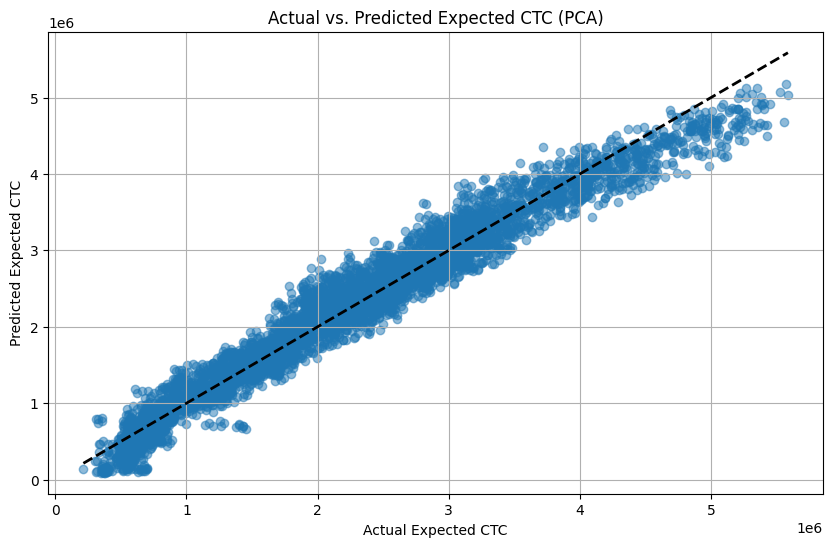

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_pca, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Expected CTC")
plt.ylabel("Predicted Expected CTC")
plt.title("Actual vs. Predicted Expected CTC (PCA)")
plt.grid(True)
plt.show()

c) Decision Trees

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor()

param_grid = {'max_depth': [None, 10, 20,30]}
dt_grid_search = GridSearchCV(estimator=dt, param_grid=param_grid)
dt_grid_search.fit(x_train, y_train)

print("Best Score Obtained :", dt_grid_search.best_score_)
print("Best Parameters :", dt_grid_search.best_params_)

Best Score Obtained : 0.9993681540197737
Best Parameters : {'max_depth': 30}


In [62]:
best_dt = dt_grid_search.best_estimator_
y_pred_dt = best_dt.predict(x_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)

Mean Squared Error: 595478129.1118822
R-squared: 0.9995597127022642


In [63]:
math.sqrt(mse_dt)

24402.420558458583

In [64]:
#We can see the Gini Importance of each of the features sorted in descending order
feature_imp = pd.DataFrame(best_dt.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = "Imp", ascending = False)

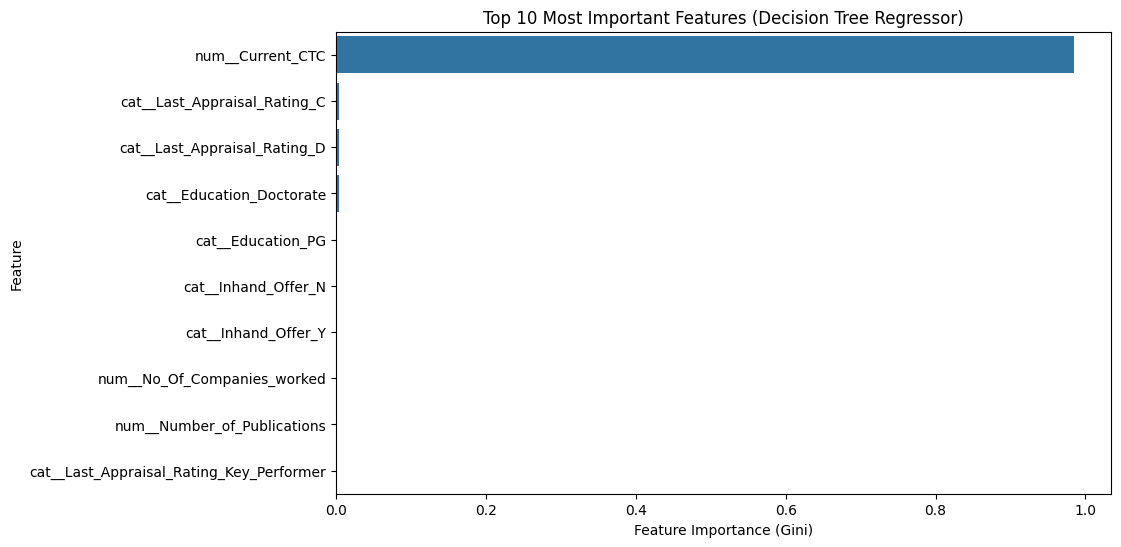

In [65]:
# Get the top 10 most important features
top_features = feature_imp.head(10)

# Graph the top 10 most important components
plt.figure(figsize=(10, 6))
sns.barplot(x='Imp', y=top_features.index, data=top_features)
plt.title('Top 10 Most Important Features (Decision Tree Regressor)')
plt.xlabel('Feature Importance (Gini)')
plt.ylabel('Feature')
plt.show()

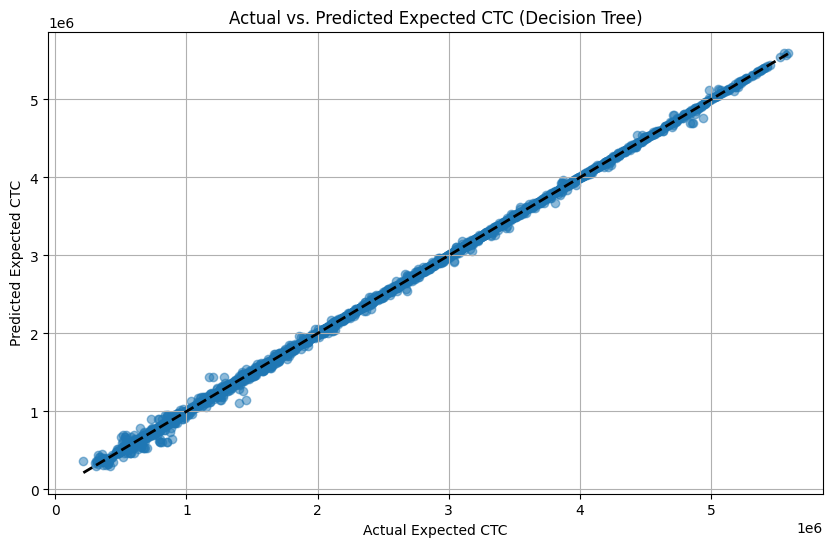

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Expected CTC")
plt.ylabel("Predicted Expected CTC")
plt.title("Actual vs. Predicted Expected CTC (Decision Tree)")
plt.grid(True)
plt.show()

b) Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 30, max_depth=20)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Tree Score :", rf.score(x_train, y_train))
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Tree Score : 0.9999342004008244
Mean Squared Error: 431415168.26811135
R-squared: 0.9996810183122555


In [68]:
math.sqrt(mse_rf)

20770.536061163933

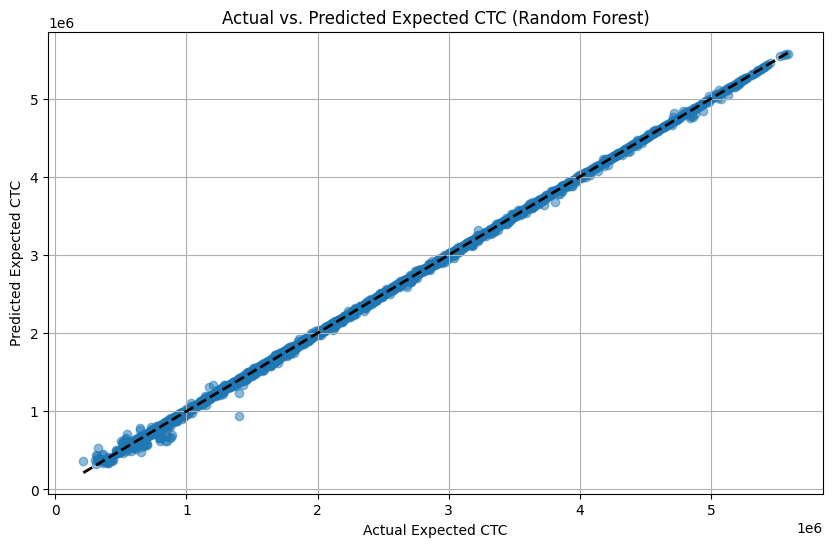

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Expected CTC")
plt.ylabel("Predicted Expected CTC")
plt.title("Actual vs. Predicted Expected CTC (Random Forest)")
plt.grid(True)
plt.show()

e) XGBoost Regressor

In [70]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators = 150, learning_rate = 0.1, max_depth = 3)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Tree Score :", xgb_model.score(x_train, y_train))
print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)

Tree Score : 0.9990921609512637
Mean Squared Error: 1193303101.5179322
R-squared: 0.9991176901849768


In [71]:
math.sqrt(mse_xgb)

34544.219509462535

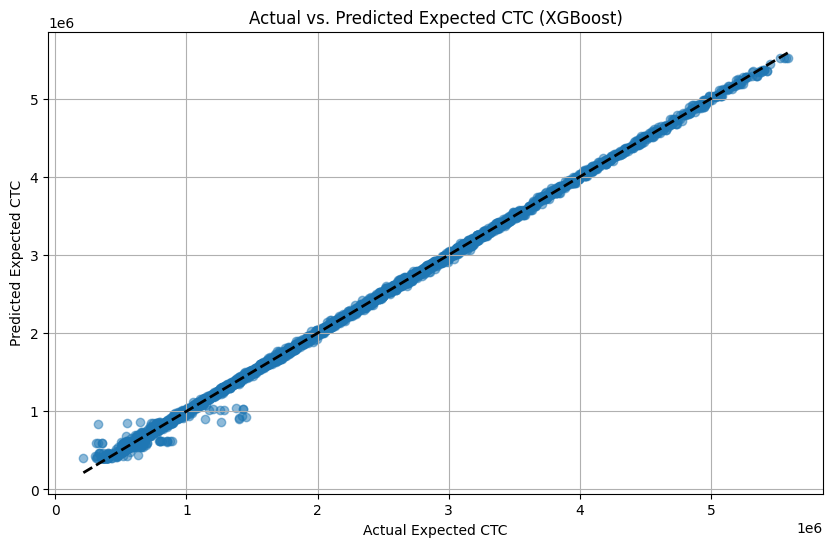

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Expected CTC")
plt.ylabel("Predicted Expected CTC")
plt.title("Actual vs. Predicted Expected CTC (XGBoost)")
plt.grid(True)
plt.show()